In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.simplefilter('ignore')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [3]:
PCOS_inf = pd.read_csv('PCOS_infertility.csv')
PCOS_woinf = pd.read_excel('PCOS_data_without_infertility.xlsx', sheet_name="Full_new")

X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1)
y=data["PCOS (Y/N)"]

In [4]:
X = X.to_numpy()
sample_size = X.shape[0]
time_steps  = X.shape[1]
input_dimension = 1
train_data_reshaped = X.reshape(sample_size,time_steps,input_dimension)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1000)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
rf_clf = LinearDiscriminantAnalysis()
rf_clf.fit(X_train,y_train)
acc_rf_clf_train = round(rf_clf.score(X_train, y_train)*100,2) 
acc_rf_clf_test = round(rf_clf.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_clf_train))
print("Testing Accuracy: % {}".format(acc_rf_clf_test))

Training Accuracy: % 91.98
Testing Accuracy: % 89.09


In [9]:
rf_prob_y_pred = rf_clf.predict_proba(X_test)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_prob_y_pred[:,1])
rf_auc = auc(rf_fpr, rf_tpr)

[]

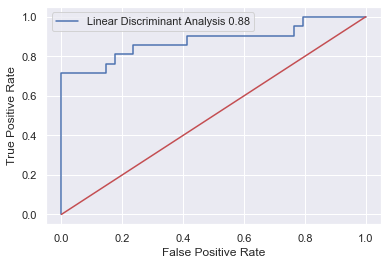

In [11]:
sns.set(style="darkgrid")
plt.plot(rf_fpr, rf_tpr, label = 'Linear Discriminant Analysis %0.2f'%rf_auc)
plt.plot([0,1],[0,1],'r-')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot()

In [12]:
pred_rf = rf_clf.predict(X_test)
from sklearn.metrics import classification_report
classi_report = classification_report(y_test, pred_rf)
print(classi_report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        34
           1       1.00      0.71      0.83        21

    accuracy                           0.89        55
   macro avg       0.93      0.86      0.88        55
weighted avg       0.91      0.89      0.89        55

